# Classification


### Binary classification
이메일 스팸 필터, Fraud detection, Tumor 판정 등 `y={0,1}` 분류 문제를 풀려면 어떻게 해야할까?

(참고로 `y={0,1}` 2개면 binary classification problem이고, 0은 negative class, 1은 positive class 라고 말한다.)

혹시 우리가 이전에 배웠던 Linear regression을 사용할 순 없을까? 없음.  **범위를 지정해서 a 이상일땐 1, 이하일땐 0으로 하더라도 dataset이 바뀔때마다 기울기가 바뀌어서** 다른 모델이 필요함. 

그렇게 생각해낸 것이 바로 Logistic regression. 직선(linear)을 사용하지 않고, [S 커브(logistic)](https://en.wikipedia.org/wiki/Logistic_function)을 사용하는 것이다. 이 S커브는 정의역 $x \in ({-\infty, \infty}) $에서 정의되고 항상 0에서 1사이 값을 갖는다.

### Logistic function

$$ h(x) = \frac{1}{(1+{e^{-{x}}})} $$

이 S 커브가 Logistic function이고, 이 함수를 모델로 Logistic regression을 할 것이다. 아래는 실제로 한 번 그려보는 코드.

(참고로 logistic function 대신 sigmoid function이라고도 함.)

In [48]:
# Package path
import sys; sys.path.append('/usr/local/lib/python2.7/site-packages')
                            
import math
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# e^4
math.exp(4)

54.598150033144236

In [50]:
def logistic(t):
    return 1.0 / (1.0+math.exp(-t))

In [51]:
# -6부터 6까지 500개 등분 (linearly spaced)
t = np.linspace(-6, 6, 500)

In [52]:
# logistic 함수를 그리기 위해 해당 정의역에서 y 값을 그림
y = np.array([logistic(ele) for ele in t])

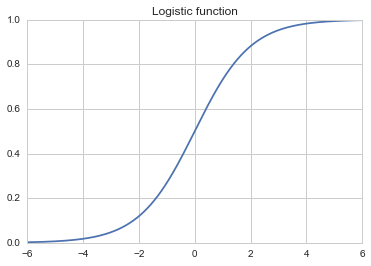

In [61]:
plt.plot(t,y)
plt.title('Logistic function')

### Logistic regression

그래서 저 S 커브로 어떻게 분류 작업을 하느냐인데, Logistic regression의 기본적인 개념은 이 Logistic Function의 y값을 y가 1이 될 확률로 보는 것이다. 

$$ h_{\theta}(x) = \frac{1}{(1+{e^{-{\theta}^T{x}}})} = P\left(y=1\middle | x; \theta\right)$$

그래서 $P\left(y=1\middle | x; \theta\right)$이 확률이 0.5가 이상이면 1로 분류하고, 0.5 미만이면 0으로 분류하는 것이다. 그런데 그래프에서 y값(확률)이 0.5보다 커지는 기준을 보면 ${\theta}^T{x} > 0$ 일때 이다. 이때 확률이 0.5가 되는 지점 즉 ${\theta}^T{x}=0$이 되는 점들을 **Descision boundary**라고 한다.

### 일단 해보고 다시 봅시다.

목표는 모델을 이렇게 두고, 최적의 $\theta$ 값을 찾는 것이다. 그러기 위해선 우선 **Decision boundary**를 알아야하는데, 이는 해당 데이터의 추측값 y가 0인지 1일지 판별하는 기준을 말하는 것이다. 예를 들어 위 그래프에서 

1. default $\theta$값을 두고, 해당 모델에 데이터들을 적용해 Cost function을 구한다.
2. 이 모델의 Cost function은 Linear regression과 해석이 조금 다르게 된다. 
2. 가장 Cost function 값이 작은 $\theta$값을 찾는다.

In [57]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# math
import math

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# datasets
import statsmodels.api as sm

In [58]:
df = sm.datasets.fair.load_pandas().data

In [59]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


# References
- https://en.wikibooks.org/wiki/LaTeX/Mathematics
- http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb